In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from scipy.optimize import curve_fit
from collections import OrderedDict
import spicy as sp
import string as str

In [8]:
input_dir = '/Users/hannadixon/Desktop/OneDrive - UW/Hanna Dixon/20240718 CV'
filename = "20240718 RRe 100mMol KTFSI CV.txt"
file_path = os.path.join(input_dir, filename)

In [10]:
data = pd.read_csv(file_path, delimiter=';')

In [11]:
print(data)

      Potential applied (V)    Time (s)  WE(1).Current (A)  Scan  Index  \
0                  0.002441    7.132795          -0.000002     1      1   
1                  0.004883    7.181623          -0.000002     1      2   
2                  0.007324    7.230451          -0.000001     1      3   
3                  0.009766    7.279279          -0.000001     1      4   
4                  0.012207    7.328107          -0.000001     1      5   
...                     ...         ...                ...   ...    ...   
4423              -0.009766  223.099038           0.000005     3   4424   
4424              -0.007324  223.147866           0.000005     3   4425   
4425              -0.004883  223.196694           0.000005     3   4426   
4426              -0.002441  223.245522           0.000005     3   4427   
4427               0.000000  223.294350           0.000005     3   4428   

            Q+        Q- Current range  
0     0.003963 -0.003413         10 mA  
1     0.003963 -0

In [14]:
Scan = data["Scan"]

In [16]:
'''second = np.where(Scan == 2) [0]'''

'second = np.where(Scan == 2) [0]'

In [18]:
'''data = data[second[0]:second[-1]]'''

'data = data[second[0]:second[-1]]'

In [20]:
Potential = data["Potential applied (V)"]
Time = data["Time (s)"]
Current = data["WE(1).Current (A)"]

In [22]:
Potential

0       0.002441
1       0.004883
2       0.007324
3       0.009766
4       0.012207
          ...   
4423   -0.009766
4424   -0.007324
4425   -0.004883
4426   -0.002441
4427    0.000000
Name: Potential applied (V), Length: 4428, dtype: float64

In [24]:
'''index_set = np.where((Potential > 0.0) & (Potential < 0.35)) [0]
print(index_set[-1])
index_setfixed = index_set + second[0]
print(Potential[index_setfixed])'''

'index_set = np.where((Potential > 0.0) & (Potential < 0.35)) [0]\nprint(index_set[-1])\nindex_setfixed = index_set + second[0]\nprint(Potential[index_setfixed])'

In [26]:
'''index_set2 = np.where((Potential > 0.0) & (Potential < 0.6)) [0]
print(index_set2[-1])
index_setfixed2 = index_set2 + second[0]
print(Potential[index_setfixed2])'''

'index_set2 = np.where((Potential > 0.0) & (Potential < 0.6)) [0]\nprint(index_set2[-1])\nindex_setfixed2 = index_set2 + second[0]\nprint(Potential[index_setfixed2])'

In [28]:
'''value, threshold = max((value, index) for (index, value) in enumerate(Current[index_setfixed]))'''

'value, threshold = max((value, index) for (index, value) in enumerate(Current[index_setfixed]))'

In [30]:
'''value2, threshold2 = min((value, index) for (index, value) in enumerate(Current[index_setfixed2]))'''

'value2, threshold2 = min((value, index) for (index, value) in enumerate(Current[index_setfixed2]))'

In [32]:
'''Potential[index_setfixed[threshold]]'''

'Potential[index_setfixed[threshold]]'

In [34]:
'''Potential[index_setfixed2[threshold2]]'''

'Potential[index_setfixed2[threshold2]]'

In [36]:
'''threshold_potential = ((Potential[index_setfixed2[threshold2]] - Potential[index_setfixed[threshold]]) / 2) + Potential[index_setfixed[threshold]]
print(threshold_potential)
threshold_potentialmin = threshold_potential - 0.001225
threshold_potentialmax = threshold_potential + 0.001225
print(threshold_potentialrange)
threshold_index = np.where((Potential[index_setfixed2] <= threshold_potentialmax) & (Potential[index_setfixed2] >= threshold_potentialmin)) [0]
print(threshold_index)
print(Potential[index_setfixed2[threshold_index]])
threshold_indexfixed = threshold_index[0]
print(threshold_indexfixed)
print(Potential[index_setfixed[threshold_indexfixed]])'''

'threshold_potential = ((Potential[index_setfixed2[threshold2]] - Potential[index_setfixed[threshold]]) / 2) + Potential[index_setfixed[threshold]]\nprint(threshold_potential)\nthreshold_potentialmin = threshold_potential - 0.001225\nthreshold_potentialmax = threshold_potential + 0.001225\nprint(threshold_potentialrange)\nthreshold_index = np.where((Potential[index_setfixed2] <= threshold_potentialmax) & (Potential[index_setfixed2] >= threshold_potentialmin)) [0]\nprint(threshold_index)\nprint(Potential[index_setfixed2[threshold_index]])\nthreshold_indexfixed = threshold_index[0]\nprint(threshold_indexfixed)\nprint(Potential[index_setfixed[threshold_indexfixed]])'

"axis1.text(-0.8, 0.00014, 'Oxidation potential = 0.259')\naxis1.text(-0.8, 0.00011, 'Reduction potential = 0.435')\naxis1.text(-0.8, 0.00008, 'Threshold potential = 0.347')\naxis1.legend()"

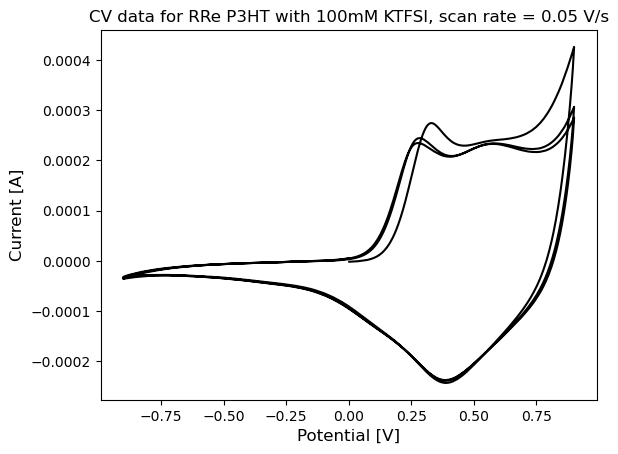

In [40]:
figure1, axis1 = plot.subplots()

axis1.plot(Potential, Current, linestyle = 'solid',
           marker = 'None', color = 'black')
'''axis1.plot(Potential[index_setfixed[threshold]], value, linestyle = 'None',
           marker = 'o', color = 'blue', label = 'Oxidation potential')
axis1.plot(Potential[index_setfixed2[threshold2]], value2, linestyle = 'None',
           marker = 'o', color = 'purple', label = 'Reduction potential')
axis1.plot(Potential[index_setfixed[threshold_indexfixed]], Current[index_setfixed[threshold_indexfixed]], linestyle = 'None',
           marker = 'o', color = 'green', label = 'Threshold potential')'''

axis1.set_xlabel('Potential [V]', fontsize = 12)
axis1.set_ylabel('Current [A]', fontsize = 12)
axis1.set_title('CV data for RRe P3HT with 100mM KTFSI, scan rate = 0.05 V/s', fontsize = 12)
'''axis1.text(-0.8, 0.00014, 'Oxidation potential = 0.259')
axis1.text(-0.8, 0.00011, 'Reduction potential = 0.435')
axis1.text(-0.8, 0.00008, 'Threshold potential = 0.347')
axis1.legend()'''